In [118]:
import wandb
import matplotlib.pyplot as plt
import numpy as np


api = wandb.Api()

# Project is specified by <entity/project-name>
runs = api.runs("brjathu/neurips2020")
summary_list = [] 
config_list = [] 
name_list = [] 
for run in runs: 
    # run.summary are the output key/values like accuracy.
    # We call ._json_dict to omit large files 
    summary_list.append(run.summary._json_dict) 

    # run.config is the input metrics.
    # We remove special values that start with _.
    config = {k:v for k,v in run.config.items() if not k.startswith('_')}
    config_list.append(config) 

    # run.name is the name of the run.
    name_list.append(run.name)       
    history = run.scan_history()



import pandas as pd 
summary_df = pd.DataFrame.from_records(summary_list) 
config_df = pd.DataFrame.from_records(config_list) 
name_df = pd.DataFrame({'name': name_list}) 
all_df = pd.concat([name_df, config_df,summary_df], axis=1)

all_df.to_csv("project.csv")


In [1]:
import wandb
import matplotlib.pyplot as plt
import numpy as np

api = wandb.Api()

plt.figure(figsize=(7,6))
x = []
y = []
e = []
c = ["brown", "steelblue", "forestgreen", "orange", "tomato", "m", "gold"]
h = [".", "//", "+", "o", "x", "|", "\\"]
i = 0

runs = api.runs("brjathu/neurips2020")
for run in runs:
    config = {k:v for k,v in run.config.items() if not k.startswith('_')}
    if("alpha" in config['tags'] and "cifarfs" in config['tags']):
#         print(run.summary._json_dict.keys(), config["gamma"])
        try:
            y = run.summary._json_dict["Final Meta Test Acc  (feat) @1"]
            x = config["gamma"]
            e = run.summary._json_dict["Final Meta Test std  (feat) @1"]
            plt.bar(x,y, yerr=e, width=0.35, alpha=0.6, label="s", hatch=h[i], ecolor='black', capsize=10)
            i += 1
        except:
            pass
        

plt.grid(b=True, which='major', color='gray', linestyle='-', alpha=0.4)
plt.grid(b=True, which='minor', color='gray', linestyle='--', alpha=0.1)
plt.minorticks_on()

plt.ylim([72,76])
# plt.xlim([0,66])
# plt.legend(loc='upper right',  ncol=4, handleheight=1.0, labelspacing=0.05, fontsize='large')
plt.xlabel("$\\alpha$ values", fontweight='bold', fontsize=15)
plt.ylabel("Accuracy %", fontweight='bold', fontsize=15)
plt.title("CIFAR-FS: 5-way 1-shot ($\\alpha$ Variations)", fontweight='bold', fontsize=17)
# plt.xticks([1]+list(range(10,66,10)),fontsize=12)
# plt.yticks(range(10,95,10),fontsize=12)
plt.savefig("plots/ab_alpha.pdf", bbox_inches='tight')




[8 7 6 5 4 3 2 1 0] [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4. ]


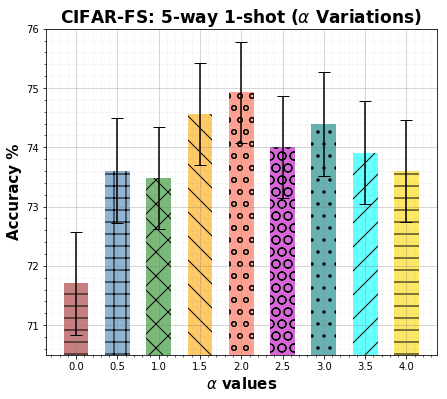

In [143]:
plt.figure(figsize=(7,6))
x = []
y = []
e = []

c = ["brown", "steelblue", "forestgreen", "orange", "tomato", "m", "teal", "cyan", "gold"]
h = (".", "//", "+", "o", "x", "|", "\\")

runs = api.runs("brjathu/neurips2020")
i = 0
for run in runs:
    config = {k:v for k,v in run.config.items() if not k.startswith('_')}
    if("alpha" in config['tags'] and "cifarfs" in config['tags']):
#         if(config["gamma"] in [0.05, 0.07, 0.1, 0.13, 0.2, 0.3, 0.4, 0.5]):
#             print(run.summary._json_dict.keys())
#             print(run.summary._json_dict["Final Meta Test Acc  (feat) @1"], config["gamma"])
            try:
#                 y=run.summary._json_dict["Final Meta Val Acc   (feat) @5"]
#                 y=run.summary._json_dict["Final Meta Test Acc  (feat) @1"]
#                 x=config["gamma"]
#                 xbar.append(x)
#                 e=run.summary._json_dict["Final Meta Test std  (feat) @1"]
#                 plt.bar(x,y, width=0.005, alpha=0.6, label="s", hatch=".", ecolor='black', capsize=10)
#                 i+=1

                y.append(run.summary._json_dict["Final Meta Test Acc  (feat) @1"])
                x.append(config["gamma"])
                e.append(run.summary._json_dict["Final Meta Test std  (feat) @1"])
                i+=1
            except:
                pass
order = np.argsort(x)
x=np.array(x)
y=np.array(y)
print(order, x[order])

bars = plt.bar(range(len(order)),y[order], yerr=e, width=0.6, alpha=0.6, color=c, label="s", ecolor='black', capsize=6)
patterns = ('-', '+', 'x', '\\', 'o', 'O', '.', "/", "-")
for bar, pattern in zip(bars, patterns):
    bar.set_hatch(pattern)
    
plt.grid(b=True, which='major', color='gray', linestyle='-', alpha=0.4)
plt.grid(b=True, which='minor', color='gray', linestyle='--', alpha=0.1)
plt.minorticks_on()

plt.ylim([70.5,76])
# plt.xlim([0,66])
# plt.legend(loc='upper right',  ncol=4, handleheight=1.0, labelspacing=0.05, fontsize='large')
plt.xlabel("$\\alpha$ values", fontweight='bold', fontsize=15)
plt.ylabel("Accuracy %", fontweight='bold', fontsize=15)
plt.title("CIFAR-FS: 5-way 1-shot ($\\alpha$ Variations)", fontweight='bold', fontsize=17)
# plt.yticks(range(10,95,10),fontsize=12)
plt.xticks(range(len(x)), x[order],fontsize=10)

plt.savefig("plots/ab_alpha.pdf", bbox_inches='tight')




[7 6 5 4 3 2 1 0] [0.05 0.07 0.1  0.13 0.2  0.3  0.4  0.5 ]


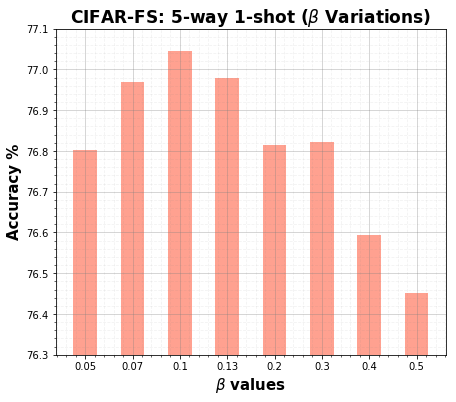

In [149]:
plt.figure(figsize=(7,6))
x = []
y = []
e = []

c = ["brown", "steelblue", "forestgreen", "orange", "tomato", "m", "teal", "gold"]
h = (".", "//", "+", "o", "x", "|", "\\")

runs = api.runs("brjathu/neurips2020")
i = 0
for run in runs:
    config = {k:v for k,v in run.config.items() if not k.startswith('_')}
    if("beta" in config['tags'] and "cifarfs" in config['tags']):
        if(config["gamma"] in [0.05, 0.07, 0.1, 0.13, 0.2, 0.3, 0.4, 0.5]):
#             print(run.summary._json_dict.keys())
#             print(run.summary._json_dict["Final Meta Test Acc  (feat) @1"], config["gamma"])
            try:
#                 y=run.summary._json_dict["Final Meta Val Acc   (feat) @5"]
#                 y=run.summary._json_dict["Final Meta Test Acc  (feat) @1"]
#                 x=config["gamma"]
#                 xbar.append(x)
#                 e=run.summary._json_dict["Final Meta Test std  (feat) @1"]
#                 plt.bar(x,y, width=0.005, alpha=0.6, label="s", hatch=".", ecolor='black', capsize=10)
#                 i+=1

                y.append(run.summary._json_dict["Final Meta Test Acc  (feat) @1"])
                x.append(config["gamma"])
                e.append(run.summary._json_dict["Final Meta Test std  (feat) @1"])
                i+=1
            except:
                pass
order = np.argsort(x)
x=np.array(x)
y=np.array(y)
print(order, x[order])

plt.bar(range(len(order)),y[order], width=0.5, alpha=0.6, color="tomato", label="s", hatch="", ecolor='black', capsize=10)

plt.grid(b=True, which='major', color='gray', linestyle='-', alpha=0.4)
plt.grid(b=True, which='minor', color='gray', linestyle='--', alpha=0.1)
plt.minorticks_on()

plt.ylim([76.3,77.1])
# plt.xlim([0,66])
# plt.legend(loc='upper right',  ncol=4, handleheight=1.0, labelspacing=0.05, fontsize='large')
plt.xlabel("$\\beta$ values", fontweight='bold', fontsize=15)
plt.ylabel("Accuracy %", fontweight='bold', fontsize=15)
plt.title("CIFAR-FS: 5-way 1-shot ($\\beta$ Variations)", fontweight='bold', fontsize=17)
# plt.yticks(range(10,95,10),fontsize=12)
plt.xticks(range(len(x)), x[order],fontsize=10)

plt.savefig("plots/ab_beta.pdf", bbox_inches='tight')




In [6]:
import seaborn as sns
import matplotlib.patheffects as PathEffects
import numpy as np
import matplotlib.pyplot as plt
def fashion_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, 0:2], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts